<a href="https://colab.research.google.com/github/Nizaru-gpt/Tiket_Langit/blob/main/Ensemble_Learning_Prediksi_Status_Kelulusan_Mahasiswa_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score

In [68]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (5).csv


In [72]:
# Load dataset
df = pd.read_csv('data.csv', delimiter=';')

In [73]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()


In [74]:
# EDA - Data types
data_types = df.dtypes

In [75]:
# EDA - Check missing values
missing_values = df.isnull().sum()


In [76]:
# EDA - Distribution of target
target_distribution = df['Target'].value_counts()


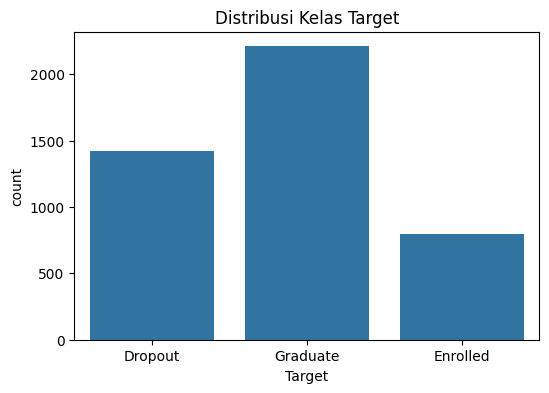

In [77]:
# Visualizations
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Target')
plt.title("Distribusi Kelas Target")
plt.show()

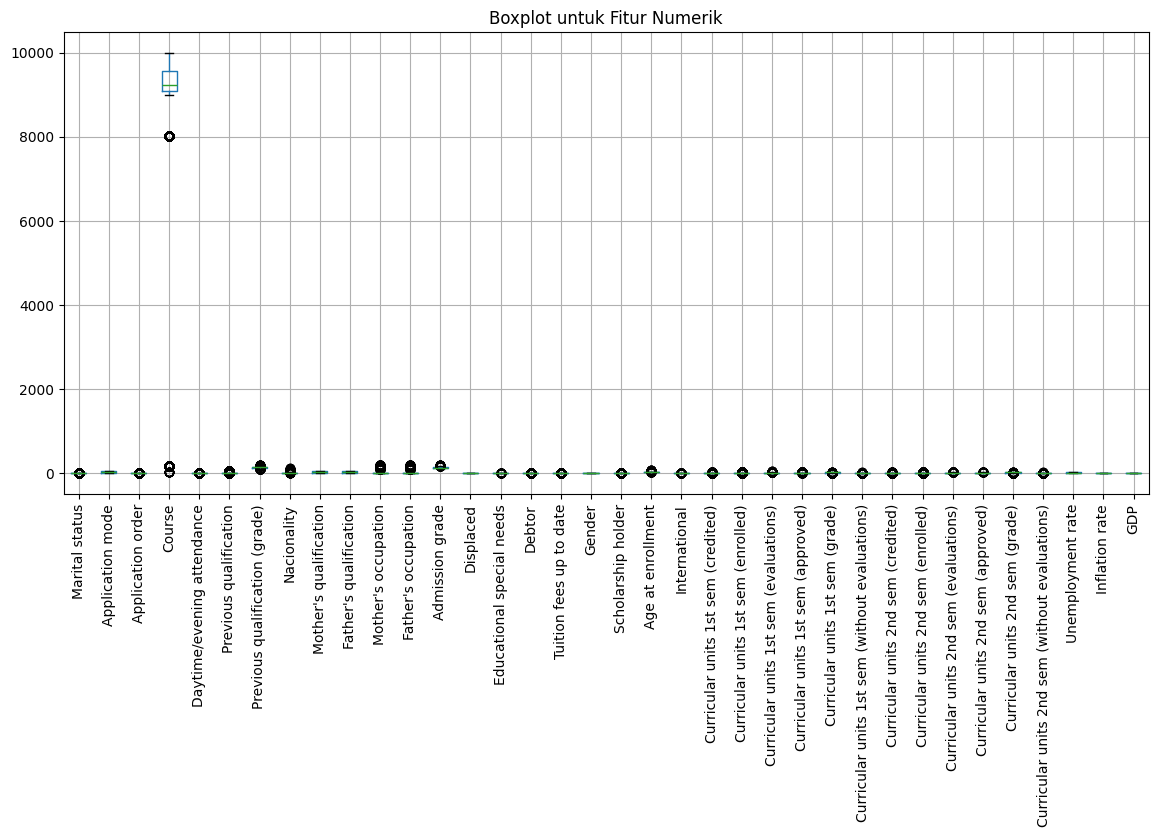

In [78]:
# Boxplot for numeric outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(14, 6))
df[numeric_cols].boxplot(rot=90)
plt.title("Boxplot untuk Fitur Numerik")
plt.show()

In [79]:
# Encoding
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [80]:
# Feature-target split
X = df.drop('Target', axis=1)
y = df['Target']

In [81]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [82]:
# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [83]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [84]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

In [87]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print("Cohen's Kappa Score:", kappa)


Accuracy: 0.7694915254237288

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       284
           1       0.57      0.38      0.45       159
           2       0.79      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.76      0.77      0.76       885

Confusion Matrix:
 [[213  22  49]
 [ 38  60  61]
 [ 11  23 408]]
Cohen's Kappa Score: 0.6102045486931251


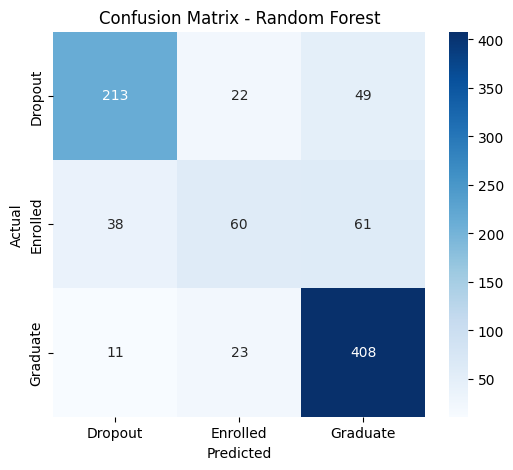

In [88]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['Target'].classes_,
            yticklabels=label_encoders['Target'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()